In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_etfs(100)], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
SPLV,50,1.538644,1.017359,1.338493,1.971361
FINX,50,1.946531,2.489638,0.710792,5.312173
XLU,50,0.903662,1.639420,0.443294,3.426052
ICLN,50,1.147435,2.492229,0.389418,4.109590
VIG,50,1.064587,2.435680,0.364445,4.634193
ITA,50,1.110447,3.181820,0.293395,6.911841
VOOG,50,1.051095,3.073722,0.284404,6.391444
SPYG,50,1.040540,3.051404,0.283025,6.359873
XLF,50,1.141032,4.210893,0.228957,7.338794


In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 1)

['SPLV'] -0.8456524821960396 0.0 0.49284013923112413 -1.3384926214271637


['SPLV']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['SPLV'])

['SPLV', 'FINX'] 0.8863379177372308 1.1147386691817092 1.8208834475592637 -2.049284199003742
['SPLV', 'XLU'] 0.8326910472515361 1.2651245661951318 1.3493532367252379 -1.7817867556688336
['SPLV', 'ICLN'] 0.36653719419000264 0.5742100782285138 1.5202375592902166 -1.7279104433287278


['SPLV', 'ICLN']

In [6]:
quote.setup_mask(['SPLV', 'ICLN'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 SPLV    0.96362
 ICLN    0.03638
 dtype: float64, 1.4778, 0.9387)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
SPLV,50.0,1.492197,0.942371,-0.950248,0.889543,1.733538,2.087735,3.297558,1.395714,1.971361
Portfolio,50.0,1.475626,0.938141,-0.959367,0.895873,1.752130,2.021642,3.410588,1.384342,1.955696
ICLN,50.0,1.097211,2.512604,-2.859960,-1.160279,1.014302,2.745302,6.210528,0.366271,4.109590


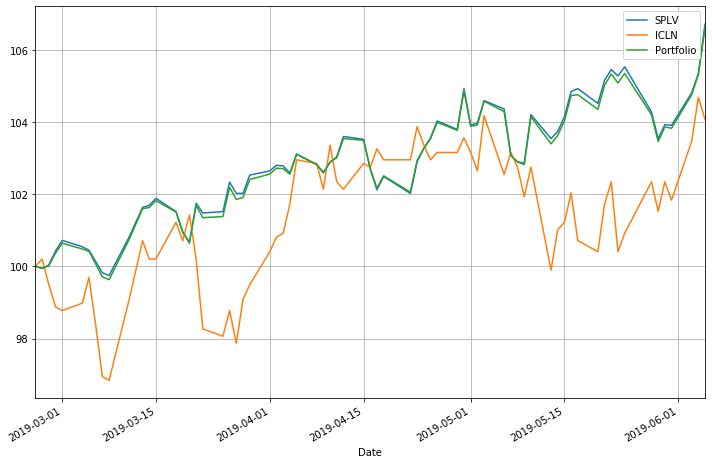

In [7]:
quote.graph(21, {'SPLV': .96, 'ICLN': .04})